# WER - Open Mini-Challenge

## Was ist der Anteil Elektroautos im Verkauf in der Schweiz in 2030?

In [649]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [650]:
# Ergibt normierte Standardabweichung
def calc_cov(mittelwert, sigma):
    return sigma / mittelwert

In [651]:
def plot_distr(dataframe, x_val):
    sns.set_style('white')
    sns.set_context("paper", font_scale = 1.5)
    sns.displot(data = dataframe, x = x_val, kind = "hist", bins = 150, aspect = 3.0)   

### 1. Anteil EV Auto
Wir haben die Daten von 2018 - 2021 herausgesucht und daraus ein linearer Trend bis 2030 aufgestellt. Laut Trend wird der Anteil E-Autos in 2030 bei 44.20% liegen. Das Ergebnis wird sich noch durch unsere Zufallsvariablen, die wir weiter unten definiert haben, ändern.

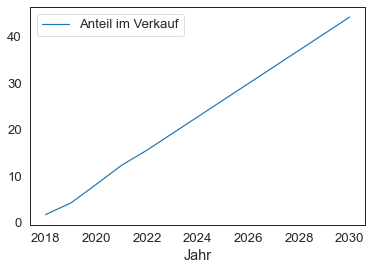

In [652]:
df_anteil = pd.read_csv("Anteil_E_Autos.csv")
df_anteil.plot(x="Jahr", y="Anteil im Verkauf")
plt.show()

In [653]:
df_anteil

,Jahr,Anteil im Verkauf
0,2018,1.70
1,2019,4.20
2,2020,8.20
3,2021,12.30
4,2022,15.55
5,2023,19.13
6,2024,22.71
7,2025,26.29
8,2026,29.87
9,2027,33.45


### 2.1 Zufallsvariable: Reichweite
Wir haben die 10 Elektroautos mit der grössten Reichweite der letzten 4 Jahre rausgesucht und dazu ein Diagramm aufgestellt. 




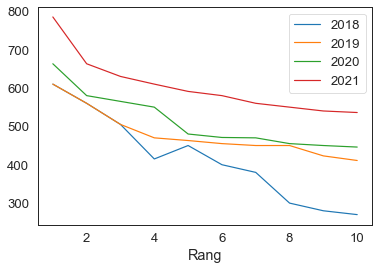

In [654]:
# Top 10 Reichweiten pro Jahr
df_reichw = pd.read_csv("Reichweiten.csv")
df_reichw.plot(x="Rang", y=["2018", "2019", "2020", "2021"])
plt.show()

In [655]:
df_reichw

,Rang,2021,2020,2019,2018
0,1,785,663,610,610
1,2,663,580,560,560
2,3,630,565,505,505
3,4,610,550,470,415
4,5,591,480,463,450
5,6,580,471,455,400
6,7,560,470,450,380
7,8,550,455,450,300
8,9,540,450,423,280
9,10,536,446,411,270


Anhand dieses Diagrammes sieht man, dass die Top 10 E-Autos nach Reichweite immer steigen. Das 10. Auto war in 2018 bei ungefähr 270km und in 2021 bei 536km.

Jetzt müssen wir die Werte für die unbekannte Jahren ausrechnen (2022 - 2030):
Für jedes Jahr müssen folgende Werte berechnet werde:
- Erwartungswert
- Sigma
- COV (S / E)

#### 2.1.1 Daten vorbereiten 

In [656]:
# Vorhandene Erwartungswerte in eienr Liste hinzufügen
mit_reichw = []
mit_reichw.append(np.mean(df_reichw["2018"]))
mit_reichw.append(np.mean(df_reichw["2019"]))
mit_reichw.append(np.mean(df_reichw["2020"]))
mit_reichw.append(np.mean(df_reichw["2021"]))

# Standardabweichungen für jedes Jahr berechnen und in einer Liste hinzufügen
stab_reichw = []
stab_reichw.append(np.std(df_reichw["2018"]))
stab_reichw.append(np.std(df_reichw["2019"]))
stab_reichw.append(np.std(df_reichw["2020"]))
stab_reichw.append(np.std(df_reichw["2021"]))

# Coefficient of variation (Variationskoeffizient)
cov_reichw = [calc_cov(mit_reichw[i], stab_reichw[i]) for i in range(4)]

# Durchschnitt COV:
mit_cov_reichw = np.mean(cov_reichw)
print("Mittelwert cov: {}".format(mit_cov_reichw))

Mittelwert cov: 0.16024008921631805


In [657]:
# Standardabweichung = cov * Erwartungswert
# Prüfung:
print("Stab durch cov:   {}".format(cov_reichw[0] * mit_reichw[0]))
print("Stab durch numpy: {}".format(stab_reichw[0]))

Stab durch cov:   110.57124400132251
Stab durch numpy: 110.57124400132251


In [658]:
# In Excel ausgerechnete Mittelwerte für unbekannte Jahren 2022 - 2030 (TREND)
mit_reichw_neu = [653.0, 712.7, 772.4, 832.1, 891.8, 951.5, 1011.2, 1070.9, 1130.6]

# Standardabweichungen für unbekannte Jahren
stab_reichw_neu = [i * mit_cov_reichw for i in mit_reichw_neu]

#### 2.1.2 Extrapolation

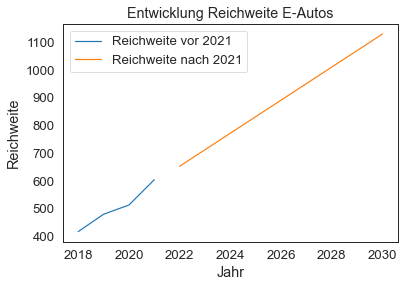

In [659]:
jahren_vor = list(range(2018, 2022))
jahren_nach = list(range(2022, 2031))

plt.plot(jahren_vor, mit_reichw, label = "Reichweite vor 2021")
plt.plot(jahren_nach, mit_reichw_neu, label = "Reichweite nach 2021")
plt.xlabel('Jahr')
plt.ylabel('Reichweite')
plt.title('Entwicklung Reichweite E-Autos')
plt.legend(loc="upper left")
plt.show()

#### 2.1.3 Wahrscheinlichkeitsverteilung 2021 
Stetig, > 0

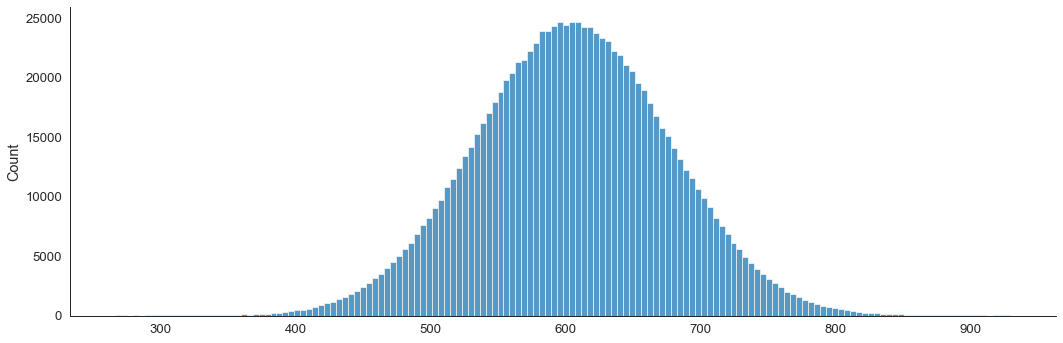

In [660]:
reichw_2021 = mit_reichw[3]
stab_reichw_2021 = stab_reichw[3]

sim_reichweite = np.random.normal(reichw_2021, stab_reichw_2021, 1_000_000)
df_sim_reichweite = pd.DataFrame(sim_reichweite)
plot_distr(df_sim_reichweite, sim_reichweite)

#### 2.1.4 Wahrscheinlichkeitsverteilung 2030

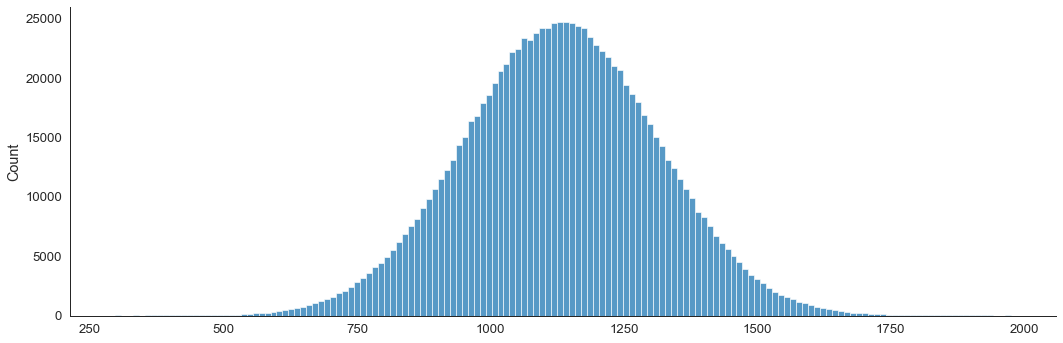

In [661]:
reichw_2030 = mit_reichw_neu[-1]
stab_reichw_2030 = stab_reichw_neu[-1]

sim_reichweite = np.random.normal(reichw_2030, stab_reichw_2030, 1_000_000)
df_sim_reichweite = pd.DataFrame(sim_reichweite)
plot_distr(df_sim_reichweite, sim_reichweite)

#### (2.1.5 Wahrscheinlichkeitsverteilung 2050)

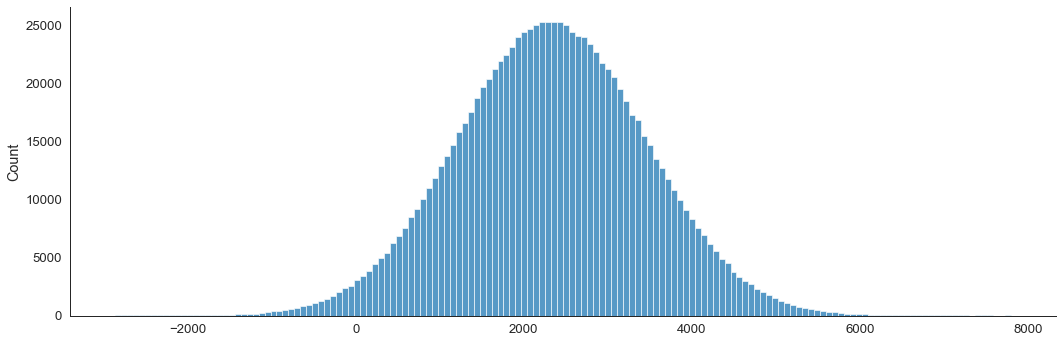

In [662]:
new_reichw = [
1190.3,
1250,
1309.7,
1369.4,
1429.1,
1488.8,
1548.5,
1608.2,
1667.9,
1727.6,
1787.3,
1847,
1906.7,
1966.4,
2026.1,
2085.8,
2145.5,
2205.2,
2264.9,
2324.6
]

new_std = [i * mit_cov for i in new_reichw]

reichw_2050 = new_reichw[-1]
stab_2050 = new_std[-1]

sim_reichweite = np.random.normal(reichw_2050, stab_2050, 1_000_000)
df_sim_reichweite = pd.DataFrame(sim_reichweite)
plot_distr(df_sim_reichweite, sim_reichweite)

### 2.2 Zufallsvariable: Antriebskosten

Die Antriebskosten haben ein geopolitischer Einfluss und dadurch entsteht eine Unsicherheit.

Wir gehen davon aus, dass die E-Autos zuhause geladen werden. Dieser Preis liegt heutzutage bei 0.24.- pro KWH

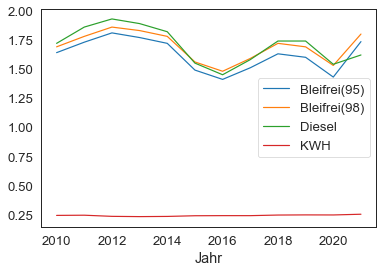

In [663]:
df_antriebkosten = pd.read_csv("Antriebkosten.csv")
df_antriebkosten.plot(x="Jahr", y=["Bleifrei(95)", "Bleifrei(98)", "Diesel", "KWH"])
plt.show()

In [664]:
df_antriebkosten

,Jahr,Bleifrei(95),Bleifrei(98),Diesel,KWH
0,2010,1.640,1.69,1.72,0.2400
1,2011,1.730,1.78,1.86,0.2416
2,2012,1.810,1.86,1.93,0.2318
3,2013,1.770,1.83,1.89,0.2295
4,2014,1.720,1.78,1.82,0.2312
5,2015,1.490,1.56,1.55,0.2370
6,2016,1.410,1.48,1.45,0.2379
7,2017,1.510,1.59,1.58,0.2378
8,2018,1.630,1.72,1.74,0.2430
9,2019,1.600,1.69,1.74,0.2443


**Trend - Antriebkosten (2010 - 2030)**

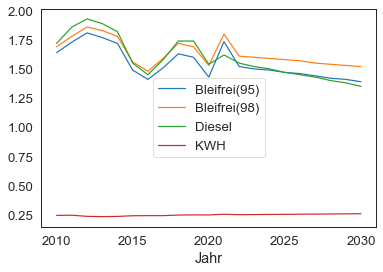

In [665]:
df_antriebkosten_trend = pd.read_csv("Antriebkosten_Trend.csv")
df_antriebkosten_trend.plot(x="Jahr", y=["Bleifrei(95)", "Bleifrei(98)", "Diesel", "KWH"])
plt.show()

In [666]:
df_antriebkosten_trend

,Jahr,Bleifrei(95),Bleifrei(98),Diesel,KWH
0,2010,1.640,1.69,1.72,0.2400
1,2011,1.730,1.78,1.86,0.2416
2,2012,1.810,1.86,1.93,0.2318
3,2013,1.770,1.83,1.89,0.2295
4,2014,1.720,1.78,1.82,0.2312
5,2015,1.490,1.56,1.55,0.2370
6,2016,1.410,1.48,1.45,0.2379
7,2017,1.510,1.59,1.58,0.2378
8,2018,1.630,1.72,1.74,0.2430
9,2019,1.600,1.69,1.74,0.2443


#### 2.2.1 Daten vorbereiten
Für Benzin bestimmen wir die Variationskoeffizient bei 0.2. Dann unterteilen wir die Daten in 2 Listen (1. vor 2021, 2. nach 2021)

In [667]:
mit_cov_antrieb = 0.2

In [668]:
mit_bleifrei = []
mit_bleifrei_neu = []

for i in range(len(df_antriebkosten_trend["Bleifrei(95)"])):
    # Werte von 2010 - 2021 zu einer Liste hinzufügen
    if i <= 11:
        mit_bleifrei.append(df_antriebkosten_trend["Bleifrei(95)"][i])
    # Werte von 2022 - 2030 zu einer Liste hinzufügen
    else:
        mit_bleifrei_neu.append(df_antriebkosten_trend["Bleifrei(95)"][i])

#### 2.2.2 Extrapolation
Für die Extrapolation reicht es wenn wir nur 1 Benzinart nehmen: Bleifrei 95 

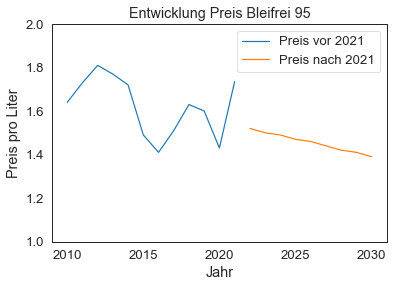

In [669]:
jahren_vor = list(range(2010, 2022))
jahren_nach = list(range(2022, 2031))

plt.plot(jahren_vor, mit_bleifrei, label = "Preis vor 2021")
plt.plot(jahren_nach, mit_bleifrei_neu, label = "Preis nach 2021")
plt.xlabel("Jahr")
plt.ylabel("Preis pro Liter")
plt.title("Entwicklung Preis Bleifrei 95")
plt.legend(loc="upper right")
plt.ylim(1, 2)
plt.show()

#### 2.2.3 Wahrscheinlichkeitsverteilung 2021

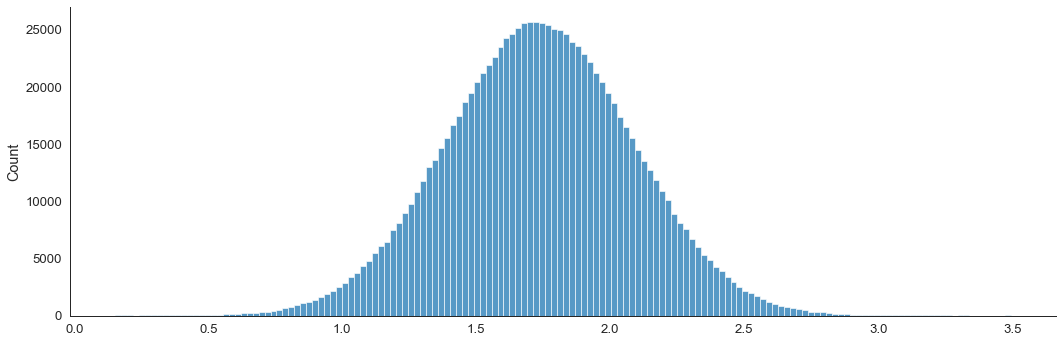

In [670]:
mu_bleifrei_2021 = mit_bleifrei[11]
stab_bleifrei_2021 = mu_bleifrei_2021 * mit_cov_antrieb

sim_bleifrei_2021 = np.random.normal(mu_bleifrei_2021, stab_bleifrei_2021, 1_000_000)
df_sim_bleifrei_2021 = pd.DataFrame(sim_bleifrei_2021)
plot_distr(df_sim_bleifrei_2021, sim_bleifrei_2021)

#### 2.2.4 Wahrscheinlichkeitsverteilung 2030

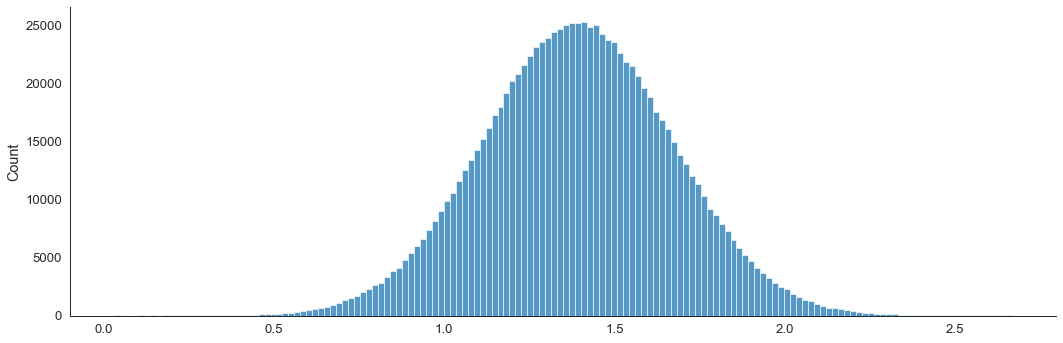

In [671]:
mu_bleifrei_2030 = mit_bleifrei_neu[-1]
stab_bleifrei_2030 = mu_bleifrei_2030 * mit_cov_antrieb

sim_bleifrei_2030 = np.random.normal(mu_bleifrei_2030, stab_bleifrei_2030, 1_000_000)
df_sim_bleifrei_2030 = pd.DataFrame(sim_bleifrei_2030)
plot_distr(df_sim_bleifrei_2030, sim_bleifrei_2030)

### 2.3 Zufallsvariable: Batteriekosten

Vor zehn Jahren galt ein Elektroauto noch als unbezahlbar. Damals kostete die Kilowattstunde (kWh) einer Lithium-Ionen-Batterie 1100 Dollar. Seitdem sind die Preise in einem rasanten Tempo gefallen: um mehr als 89 Prozent auf 137 Dollar pro kWh in 2020.


Noch dazu sammelten wir folgende Daten der Swiss E-Mobility:
- Akkupreis seit Anfang Jahrzehnt um 87% gesunken
- wird noch bis 2025 halbieren

Somit konnten wir schnell feststellen, dass die Entwicklung der Batteriekosten exponential abnehmen.--> Exponentiale Verteilung aufstellen.

Stetig, > 0


y = a (1-b)^x

In [672]:
jahr_2010 = 1100
jahr_2020 = 137
jahr_2025 = jahr_2020 / 2

x = np.array([2010, 2020, 2025])
y = np.array([jahr_2010, jahr_2020, jahr_2025])



### 2.4 Zufallsvariable: Preis EV relativ zu Benzin / Diesel
Für diesen vergleich haben wir 8 identische Autos genommen, die es als EV und Benzin / Diesel gibt.

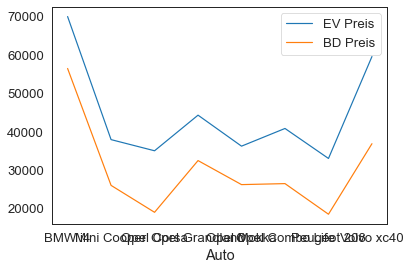

In [673]:
# Top 10 Reichweiten pro Jahr
df_preise = pd.read_csv("Autopreise_e_vs_b.csv")
df_preise.plot(x="Auto", y=["EV Preis", "BD Preis"])
plt.show()

In [681]:
mit_ev = np.mean(df_preise["EV Preis"])
mit_bd = np.mean(df_preise["BD Preis"])

print("Mittelwert EV: {}".format(mit_ev))
print("Mittelwert BD: {}".format(mit_bd))

df_preise

Mittelwert EV: 44570.0
Mittelwert BD: 30231.25


,Auto,EV Preis,BD Preis
0,BMW i4,69900,56400
1,Mini Cooper,37900,26000
2,Opel Corsa,35000,19000
3,Opel Grandland,44260,32450
4,Opel Mokka,36200,26200
5,Opel Combo Life,40800,26460
6,Peugeot 208,33000,18500
7,Volvo xc40,59500,36840


Anhand der Daten sieht man, dass der Preisunterschied zwischen Elektro - und Verbrennerautos etwa konstant bleibt und war auch so in der Vergangenheit. E-Autos waren im Schnitt immer um 10'000 teurer. Somit werden wir für die Preisentwicklung konstant rechnen.

### 2.5 Zufallsvariable: Subventionen
Die Subventionen sind kantonsbasiert und nicht alle bieten Subventionen an. Beim Kauf eines Elektroautos werden die Subventionen bis zum Jahr 2030 bestimmt zunhemen. Die jährliche Steigung definierten wir bei 2%. 

COV: 0.1

In [675]:
df_subventionen = pd.read_csv("Subventionen_Trend.csv")
df_subventionen

,Kanton,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Basel-Stadt,5000,5100,5202,5306,5412,5520,5631,5743,5858,5975
1,Wallis,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
2,Tessin,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
3,Genf,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
4,Thurgau,3000,3060,3121,3184,3247,3312,3378,3446,3515,3585
5,Schaffhausen,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
6,Waadt,1500,1530,1561,1592,1624,1656,1689,1723,1757,1793


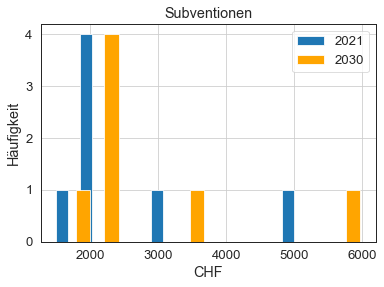

In [676]:
hist = df_subventionen["2021"].hist(bins=20, label="2021")
hist = df_subventionen["2030"].hist(bins=20, label="2030", color="orange")
hist = plt.title("Subventionen")
hist = plt.ylabel("Häufigkeit")
hist = plt.xlabel("CHF")
hist = plt.legend()

In [677]:
mit_cov_subventionen = 0.1

#### 2.5.2 Wahrscheinlichkeitsverteilung 2021

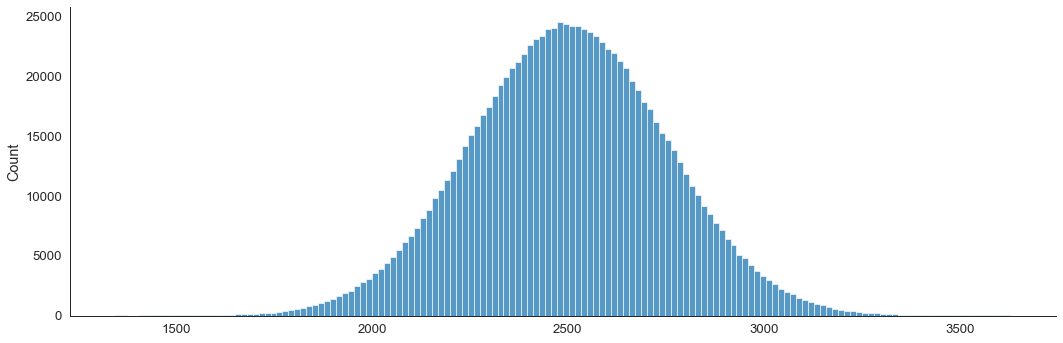

In [678]:
mu_subventionen_2021 = np.mean(df_subventionen["2021"])
stab_subventionen_2021 = mu_subventionen_2021 * mit_cov_subventionen

sim_subventionen_2021  = np.random.normal(mu_subventionen_2021, stab_subventionen_2021, 1_000_000)
df_sim_subventionen_2021 = pd.DataFrame(sim_subventionen_2021)
plot_distr(df_sim_subventionen_2021, sim_subventionen_2021)

#### 2.5.2 Wahrscheinlichkeitsverteilung 2030

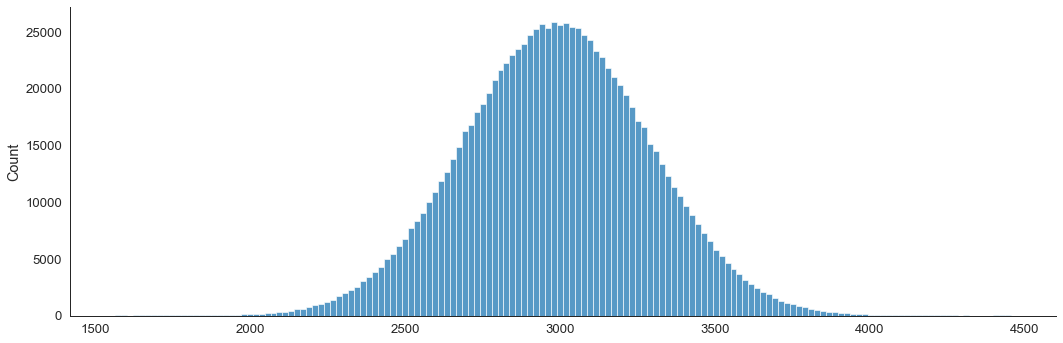

In [679]:
mu_subventionen_2030 = np.mean(df_subventionen["2030"])
stab_subventionen_2030 = mu_subventionen_2030 * mit_cov_subventionen

sim_subventionen_2030  = np.random.normal(mu_subventionen_2030, stab_subventionen_2030, 1_000_000)
df_sim_subventionen_2030 = pd.DataFrame(sim_subventionen_2030)
plot_distr(df_sim_subventionen_2030, sim_subventionen_2030)

### 3.1 Delta Kaufpreis (Händler)

### 3.2 Delta Kilometerpreis

Verifox: Durchschnittlicher Verbrauch pro 100km im Jahr 2020 liegt bei 15KWH

Statista: Durchschnittlicher Verbrauch pro 100km im Jahr 2020 liegt bei 5.7 Liter

In [680]:
verbrauch_kwh = 15
kosten_kwh = df_antriebkosten["KWH"][10]
preis_kwh = verbrauch_kwh * kosten_kwh

verbrauch_bleifrei = 5.7
kosten_bleifrei = df_antriebkosten["Bleifrei(95)"][10]
preis_bleifrei = verbrauch_bleifrei * kosten_bleifrei

print("Preis pro KWH:   CHF {}\nPreis pro Liter: CHF {}".format(preis_kwh, preis_bleifrei))

delta_km_preis = (preis_bleifrei - preis_kwh) / 100

print(delta_km_preis)

Preis pro KWH:   CHF 3.657
Preis pro Liter: CHF 8.151
0.04494


### 4. Kaufbereitschaft
In diesem Abschnitt definieren wir, wann die Kaufbereitschaft der Kunden für ein EV Fahrzeug steigt.


- Reichweite wird immer grösser
- Benzin / Diesel wird immer teurer
    - Steuern auf Benzin
    - Kilometerpreis
- Kaufpreis wird immer billiger
- Subventionen auf Kauf